<a href="https://colab.research.google.com/github/0P3R4T0R-Dev/EPR402/blob/Neural-Network-from-Tensorflow/site/en/tutorials/images/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import TensorFlow

In [2]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Load My data


In [3]:
def setupData(filename):
    print("Loading data...")
    data = pd.read_csv(filename)
    data = np.array(data)
    np.random.shuffle(data)
    print("Data loaded.")
    return data

def separateDataANDLabel(data):
    m, n = data.shape
    data_train = data.T
    Y_lbl = data_train[0]
    X_data = data_train[1:n]
    X_data = X_data / 255.
    return Y_lbl, X_data


In [4]:
data = setupData("/content/drive/MyDrive/TrainingDataEPR/train1225.csv")

Loading data...
Data loaded.


In [5]:
predict_labels, predict_dataset = separateDataANDLabel(data[:100])
y_dev, x_dev = separateDataANDLabel(data[100:2000])
y_train, x_train = separateDataANDLabel(data[2000:])
x_train_new = []
x_dev_new = []
predict_dataset_new = []

In [6]:
print(predict_labels.shape)
print(y_dev.shape)
print(y_train.shape)

(100,)
(1900,)
(22999,)


In [7]:
y_train = np.reshape(y_train, (22999, 1))
y_dev = np.reshape(y_dev, (1900, 1))
predict_labels = np.reshape(predict_labels, (100, 1))
for i, image in enumerate(x_train.T):
  x_train_new.append(np.reshape(image, (35, 35, 1)))
for image in x_dev.T:
  x_dev_new.append(np.reshape(image, (35, 35, 1)))
for image in predict_dataset.T:
  predict_dataset_new.append(np.reshape(image, (35, 35, 1)))

In [8]:
x_train_new = np.array(x_train_new)
x_dev_new = np.array(x_dev_new)
predict_dataset_new = np.array(predict_dataset_new)

In [9]:
print(x_dev_new.shape)
print(x_train_new.shape)

(1900, 35, 35, 1)
(22999, 35, 35, 1)


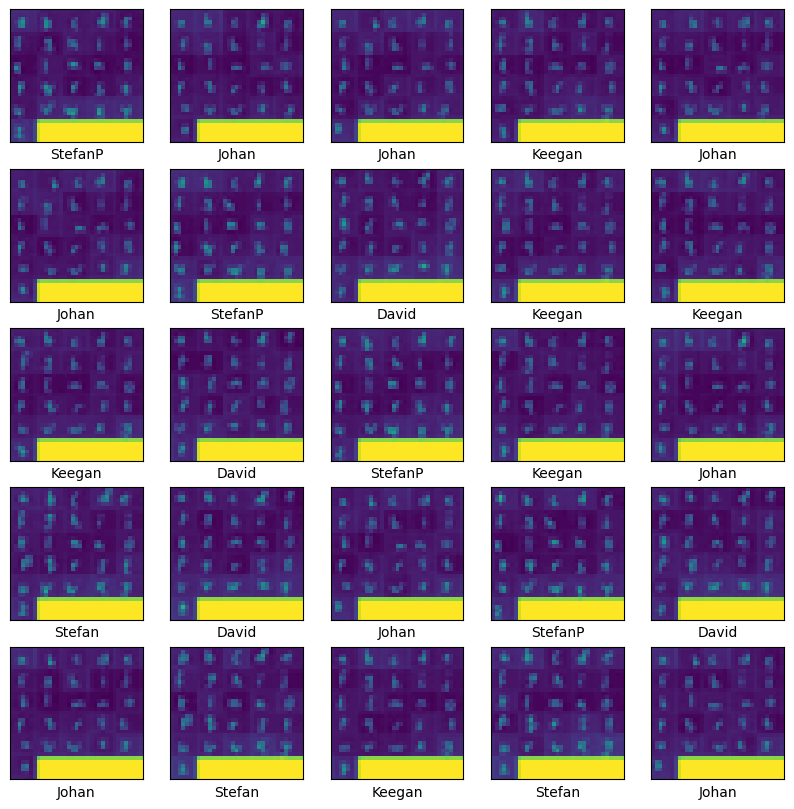

In [10]:
class_names = ['Keegan', 'Stefan', 'Johan', 'David', 'StefanP']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_new[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(35, 35, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

Here's the complete architecture of your model:

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 33, 33, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [14]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train_new, y_train, batch_size=200, epochs=30,
                    validation_data=(x_dev_new, y_dev))

Epoch 1/30
115/115 [==============================] - 38s 317ms/step - loss: 1.6047 - accuracy: 0.2821 - val_loss: 1.6023 - val_accuracy: 0.4084
Epoch 2/30
115/115 [==============================] - 33s 291ms/step - loss: 1.5990 - accuracy: 0.4051 - val_loss: 1.5965 - val_accuracy: 0.5837
Epoch 3/30
115/115 [==============================] - 36s 311ms/step - loss: 1.5929 - accuracy: 0.3944 - val_loss: 1.5899 - val_accuracy: 0.3932
Epoch 4/30
115/115 [==============================] - 36s 308ms/step - loss: 1.5858 - accuracy: 0.4477 - val_loss: 1.5820 - val_accuracy: 0.5505
Epoch 5/30
 45/115 [==========>...................] - ETA: 20s - loss: 1.5800 - accuracy: 0.6101

KeyboardInterrupt: ignored

### Evaluate the model

60/60 - 0s - loss: 0.0089 - accuracy: 1.0000 - 266ms/epoch - 4ms/step


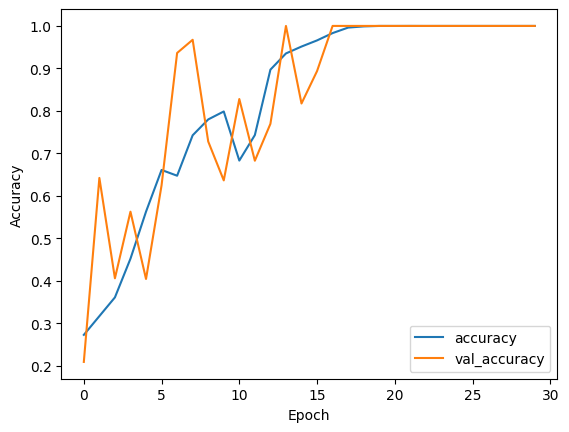

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_dev_new,  y_dev, verbose=2)

In [14]:
testData = setupData("/content/drive/MyDrive/TrainingDataEPR/train1225_test.csv")
predict_labels, predict_dataset = separateDataANDLabel(testData)
predict_dataset_new = []
for image in predict_dataset.T:
  predict_dataset_new.append(np.reshape(image, (35, 35, 1)))
predict_labels = np.reshape(predict_labels, (99, 1))
predict_dataset_new = np.array(predict_dataset_new)

Loading data...
Data loaded.


In [15]:
# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset_new, training=False)
wrongGuesses = 0
for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  if class_idx != int(predict_labels[i]):
    wrongGuesses += 1
  print("Example {} prediction: {} ({:4.1f}%) : ({})".format(i, name, 100*p, class_names[int(predict_labels[i])]))
print("Number of wrong guesses: ", wrongGuesses)

Example 0 prediction: Johan (98.7%) : (Johan)
Example 1 prediction: Johan (99.9%) : (Johan)
Example 2 prediction: Johan (99.3%) : (Johan)
Example 3 prediction: Johan (97.0%) : (Johan)
Example 4 prediction: Johan (99.1%) : (Johan)
Example 5 prediction: Johan (99.3%) : (Johan)
Example 6 prediction: Johan (99.0%) : (Johan)
Example 7 prediction: Johan (99.7%) : (Johan)
Example 8 prediction: Johan (99.6%) : (Johan)
Example 9 prediction: Johan (99.4%) : (Johan)
Example 10 prediction: Johan (99.7%) : (Johan)
Example 11 prediction: Johan (99.6%) : (Johan)
Example 12 prediction: Johan (99.2%) : (Johan)
Example 13 prediction: Johan (99.9%) : (Johan)
Example 14 prediction: Johan (98.1%) : (Johan)
Example 15 prediction: Johan (99.3%) : (Johan)
Example 16 prediction: Johan (99.2%) : (Johan)
Example 17 prediction: Johan (99.9%) : (Johan)
Example 18 prediction: Johan (99.9%) : (Johan)
Example 19 prediction: Johan (98.9%) : (Johan)
Example 20 prediction: Johan (99.7%) : (Johan)
Example 21 prediction: 